In [1]:
import pandas as pd

In [2]:
housing_df=pd.read_csv("housepricedata.csv")

In [3]:
housing_df

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1
...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,6,5,953,2,1,3,7,1,460,1
1456,13175,6,6,1542,2,0,3,7,2,500,1
1457,9042,7,9,1152,2,0,4,9,2,252,1
1458,9717,5,6,1078,1,0,2,5,0,240,0


In [4]:
dataset = housing_df.values

In [5]:
X = dataset[:,:10]
Y = dataset[:,-1]

In [6]:
from sklearn import preprocessing

In [7]:
X_scaled = preprocessing.MinMaxScaler().fit_transform(X)

In [8]:
X_scaled

array([[0.0334198 , 0.66666667, 0.5       , ..., 0.5       , 0.        ,
        0.3864598 ],
       [0.03879502, 0.55555556, 0.875     , ..., 0.33333333, 0.33333333,
        0.32440056],
       [0.04650728, 0.66666667, 0.5       , ..., 0.33333333, 0.33333333,
        0.42877292],
       ...,
       [0.03618687, 0.66666667, 1.        , ..., 0.58333333, 0.66666667,
        0.17771509],
       [0.03934189, 0.44444444, 0.625     , ..., 0.25      , 0.        ,
        0.16925247],
       [0.04037019, 0.44444444, 0.625     , ..., 0.33333333, 0.        ,
        0.19464034]])

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train,X_test,Y_train,Y_test=train_test_split(X_scaled,Y,test_size=0.3)

In [11]:
from keras.models import Sequential
from keras.layers import Dense

In [12]:
input_layer=Dense(32,activation="relu",input_shape=(10,))
hidden_layer=Dense(32,activation="relu")
output_layer=Dense(1,activation="sigmoid")
model=Sequential([input_layer,hidden_layer,output_layer])

In [13]:
model.compile(optimizer="sgd",loss="binary_crossentropy",metrics=["accuracy"])

In [14]:
history=model.fit(X_train,Y_train,batch_size=32,epochs=100,validation_data=(X_test,Y_test))

Epoch 1/100
32/32 [==============================] - 1s 13ms/step - loss: 0.6851 - accuracy: 0.5753 - val_loss: 0.6813 - val_accuracy: 0.5753
Epoch 2/100
32/32 [==============================] - 0s 5ms/step - loss: 0.6760 - accuracy: 0.5802 - val_loss: 0.6734 - val_accuracy: 0.6233
Epoch 3/100
32/32 [==============================] - 0s 6ms/step - loss: 0.6679 - accuracy: 0.6546 - val_loss: 0.6657 - val_accuracy: 0.6461
Epoch 4/100
32/32 [==============================] - 0s 5ms/step - loss: 0.6602 - accuracy: 0.6888 - val_loss: 0.6582 - val_accuracy: 0.6849
Epoch 5/100
32/32 [==============================] - 0s 6ms/step - loss: 0.6528 - accuracy: 0.7153 - val_loss: 0.6510 - val_accuracy: 0.7078
Epoch 6/100
32/32 [==============================] - 0s 5ms/step - loss: 0.6455 - accuracy: 0.7329 - val_loss: 0.6437 - val_accuracy: 0.7443
Epoch 7/100
32/32 [==============================] - 0s 5ms/step - loss: 0.6384 - accuracy: 0.7613 - val_loss: 0.6366 - val_accuracy: 0.7557
Epoch 8/100


Epoch 59/100
32/32 [==============================] - 0s 4ms/step - loss: 0.3145 - accuracy: 0.8728 - val_loss: 0.3251 - val_accuracy: 0.8653
Epoch 60/100
32/32 [==============================] - 0s 4ms/step - loss: 0.3115 - accuracy: 0.8728 - val_loss: 0.3282 - val_accuracy: 0.8653
Epoch 61/100
32/32 [==============================] - 0s 4ms/step - loss: 0.3102 - accuracy: 0.8767 - val_loss: 0.3271 - val_accuracy: 0.8653
Epoch 62/100
32/32 [==============================] - 0s 4ms/step - loss: 0.3090 - accuracy: 0.8748 - val_loss: 0.3207 - val_accuracy: 0.8653
Epoch 63/100
32/32 [==============================] - 0s 4ms/step - loss: 0.3069 - accuracy: 0.8816 - val_loss: 0.3216 - val_accuracy: 0.8653
Epoch 64/100
32/32 [==============================] - 0s 4ms/step - loss: 0.3055 - accuracy: 0.8757 - val_loss: 0.3216 - val_accuracy: 0.8653
Epoch 65/100
32/32 [==============================] - 0s 4ms/step - loss: 0.3037 - accuracy: 0.8796 - val_loss: 0.3140 - val_accuracy: 0.8699
Epoch 

In [15]:
import matplotlib.pyplot as plt

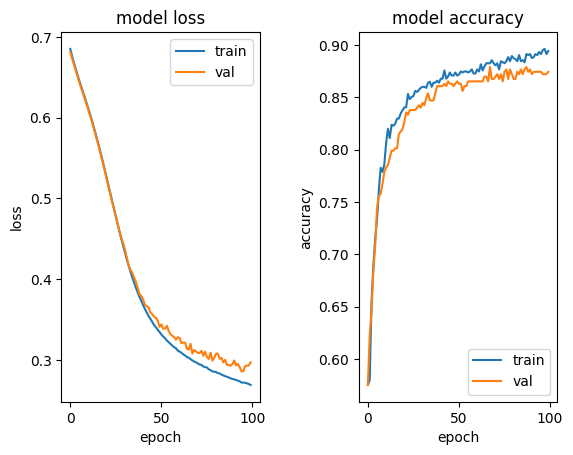

In [19]:
fig,ax=plt.subplots(1,2)
ax[0].plot(history.history["loss"],label="train")
ax[0].plot(history.history["val_loss"],label="val")
ax[0].set_title("model loss")
ax[0].set_xlabel("epoch")
ax[0].set_ylabel("loss")
ax[0].legend()
ax[1].plot(history.history["accuracy"],label="train")
ax[1].plot(history.history["val_accuracy"],label="val")
ax[1].set_title("model accuracy")
ax[1].set_xlabel("epoch")
ax[1].set_ylabel("accuracy")
ax[1].legend()
plt.subplots_adjust(wspace=0.5)
plt.show()